**Auswertung:**


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s310/20210612-1001/",
            "../checkpoints/s311/20210612-1007/",
            "../checkpoints/s312/20210612-1007/",
            "../checkpoints/s313/20210615-1523/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                        baseline_rule-based   
ddqn_new                                           0   
lr                                              0.01   
batch_size                                       128   
lambda_rwd_mstpc                                 0.1   
lambda_rwd_energy                              5e-06   
energy_cons_in_kWh                                 0   
reward_offset                                    0.0   
clip_econs_at                                    0.0   
soften_instead_of_clipping                         0   
target_network_update_freq                         3   
epsilon_final_step                               100   
epsilon_decay_mode                       exponential   
episodes_count                                   100   
agent_init_gain                                  0.8   
use_layer_normalization                            0   
fewer_q_values                                     0   
agent_w_l2                                     1e-05   
network_storage_frequency                         10   
model                        Building_5ZoneAirCooled   
single_setpoint_agent_count                      all   
next_occ_horizont                                  0   

                                                               s310  \
algorithm                                                      ddqn   
ddqn_new                                                          1   
lr                                                              0.1   
batch_size                                                      256   
lambda_rwd_mstpc                                               0.06   
lambda_rwd_energy                                             0.008   
energy_cons_in_kWh                                                1   
reward_offset                                                   0.3   
clip_econs_at                                                 150.0   
soften_instead_of_clipping                                        1   
target_network_update_freq                                        2   
epsilon_final_step                                            12500   
epsilon_decay_mode                                           linear   
episodes_count                                                  250   
agent_init_gain                                                 0.7   
use_layer_normalization                                           1   
fewer_q_values                                                    1   
agent_w_l2                                                    1e-06   
network_storage_frequency                                       250   
model                        Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                            one_but2not5   
next_occ_horizont                                                 2   

                                                               s311  \
algorithm                                                      ddqn   
ddqn_new                                                          1   
lr                                                              0.1   
batch_size                                                      256   
lambda_rwd_mstpc                                               0.06   
lambda_rwd_energy                                             0.008   
energy_cons_in_kWh                                                1   
reward_offset                                                   0.3   
clip_econs_at                                                 150.0   
soften_instead_of_clipping                                        1   
target_network_update_freq                                        2   
epsilon_final_step                                            12500   
epsilon_decay_mode                                           linear   
episodes_count                                                  250   
agent_init_gain                                             

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s310  \
Number of training episodes                      1.0   25000.000000   
Runtime in s                                     0.0  129592.475456   
Runtime in h                                     0.0      35.997910   
Mean episode runtime in s                        0.0       5.183699   
Mean episode runtime during eval. episode in s   0.0       5.268735   
Mean episode runtime after eval. episode in s    NaN       5.124475   
Mean episode runtime in no eval. episode in s    NaN       5.183358   

                                                         s311           s312  \
Number of training episodes                      25000.000000   25000.000000   
Runtime in s                                    133574.839814  131210.973118   
Runtime in h                                        37.104122      36.447493   
Mean episode runtime in s                            5.342994       5.248439   
Mean episode runtime during eval. episode in s       5.345348       5.282641   
Mean episode runtime after eval. episode in s        5.318369       5.184737   
Mean episode runtime in no eval. episode in s        5.342984       5.248302   

                                                         s313  
Number of training episodes                      25000.000000  
Runtime in s                                    148253.244436  
Runtime in h                                        41.181457  
Mean episode runtime in s                            5.930130  
Mean episode runtime during eval. episode in s       5.823711  
Mean episode runtime after eval. episode in s        5.823240  
Mean episode runtime in no eval. episode in s        5.930557

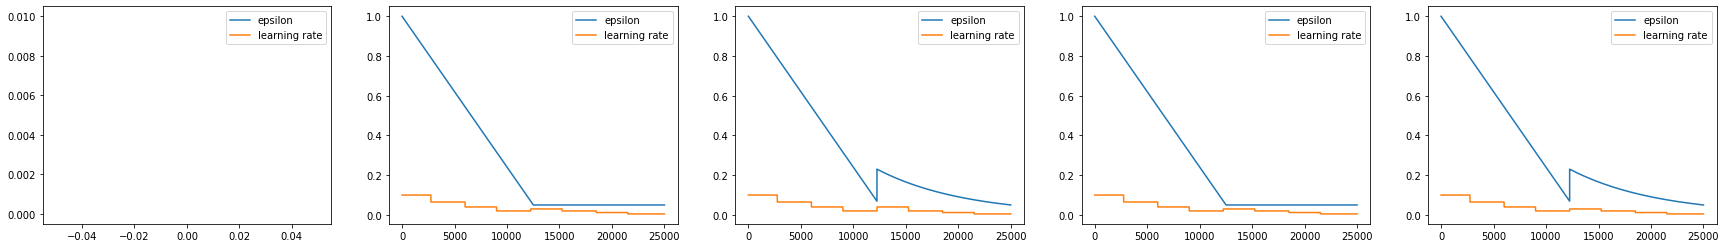

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

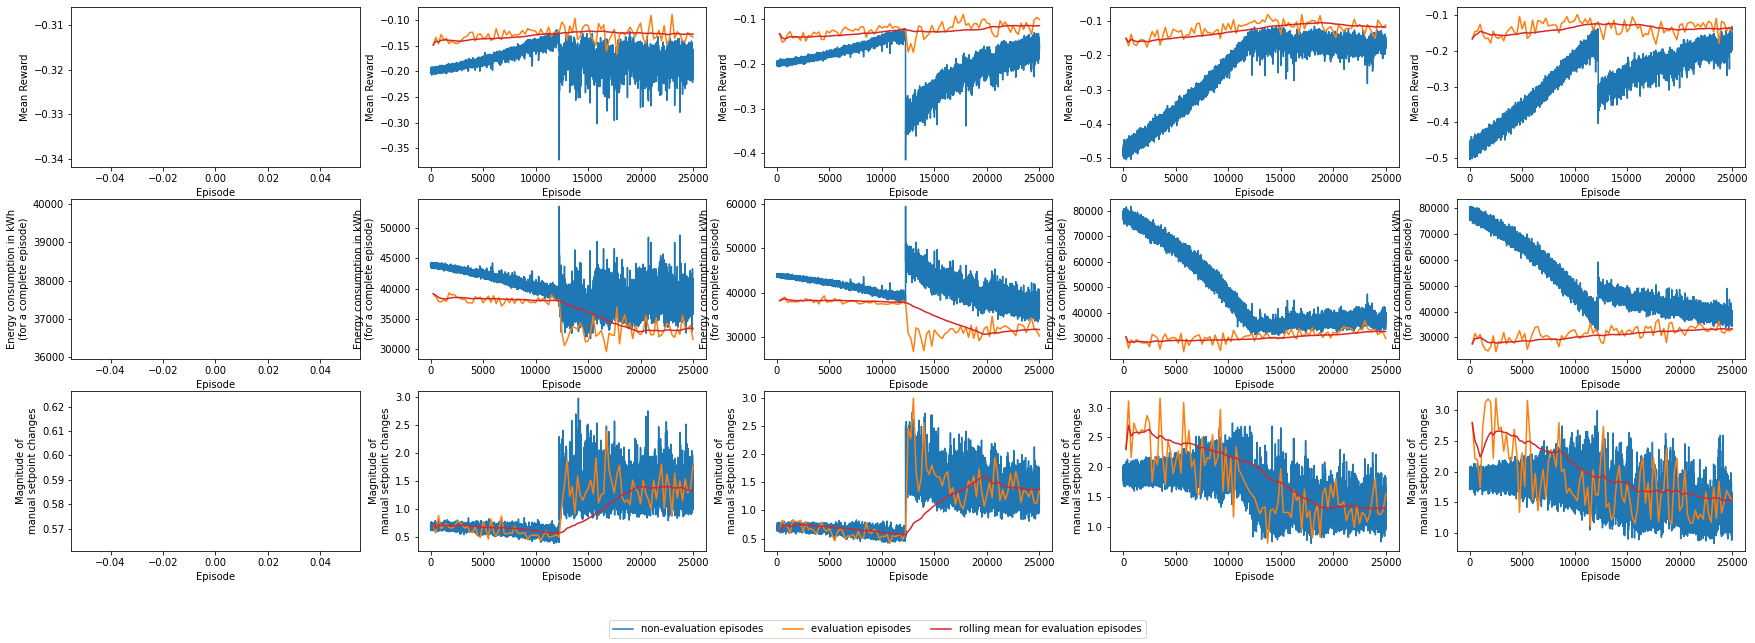

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

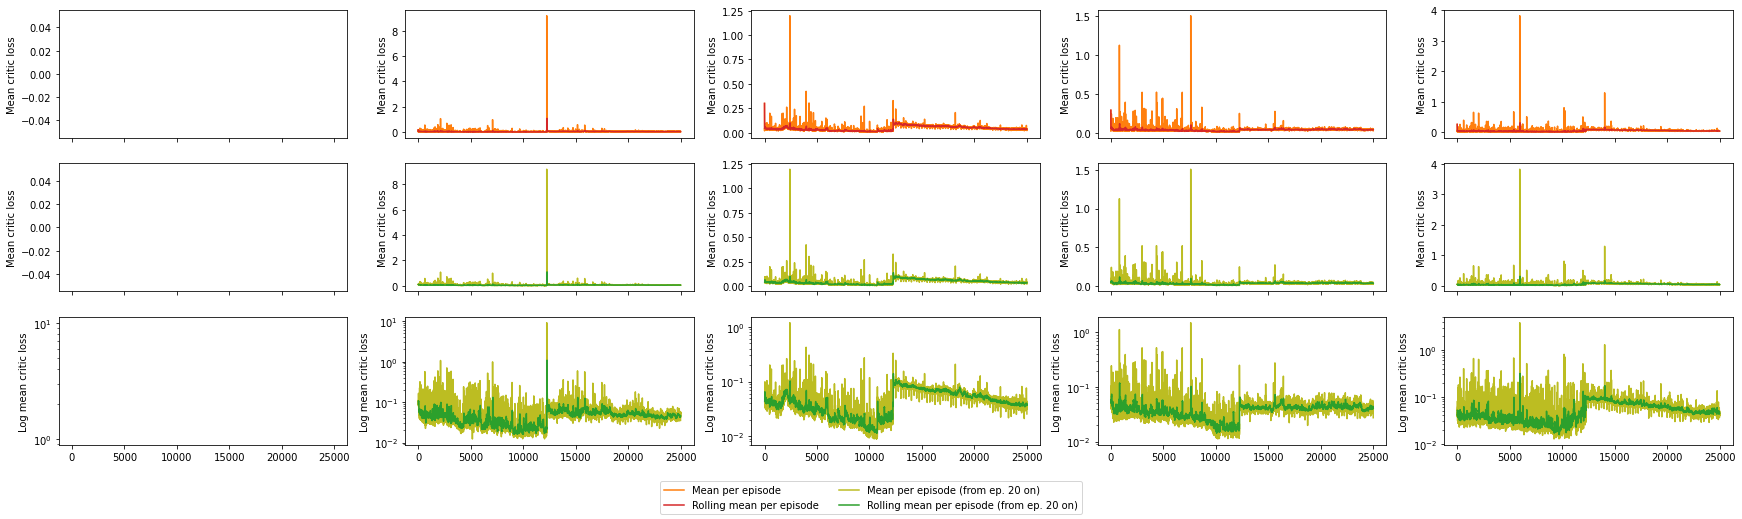

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

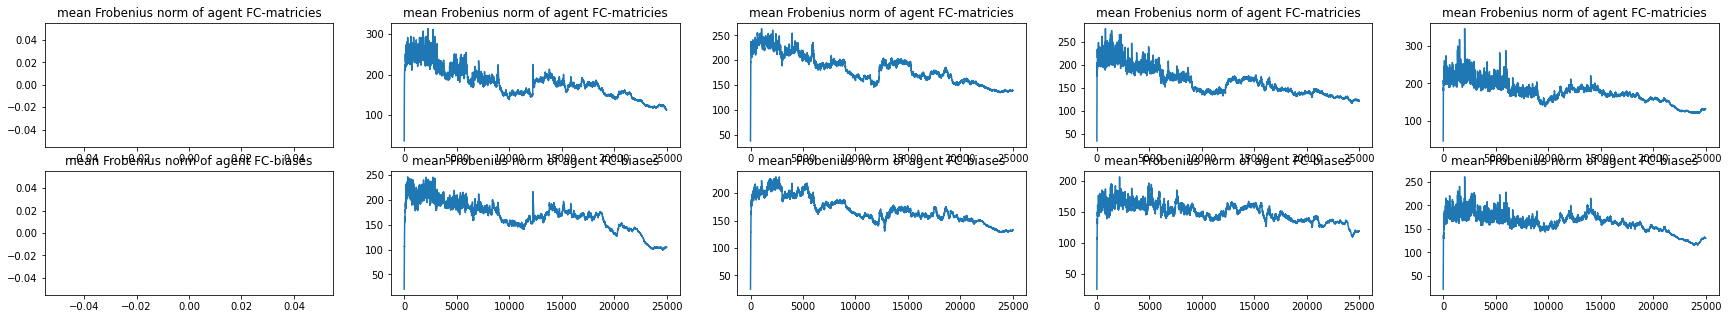

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  24999
Last available evaluation episode for dfs2:  24999
Last available evaluation episode for dfs3:  24999
Last available evaluation episode for dfs4:  24999


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 24999: Energy consumption:   31614.29 kWh; Sum of setpoint change magnitudes: 1279.1264028023809
For episode 24999: Energy consumption:   30322.53 kWh; Sum of setpoint change magnitudes: 976.7639217136568
For episode 24999: Energy consumption:   29849.37 kWh; Sum of setpoint change magnitudes: 1119.2665505387538
For episode 24999: Energy consumption:   33302.00 kWh; Sum of setpoint change magnitudes: 1088.412384993433

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 24999: Reward: -0.13245 kWh; Setpoint change magnit.:  1.77904; Energy cons.: 43969.79884
... 24999: Reward: -0.10106 kWh; Setpoint change magnit.:  1.35850; Energy cons.: 42173.20429
... 24999: Reward: -0.11106 kWh; Setpoint change magnit.:  1.55670; Energy cons.: 41515.11435
... 24999:

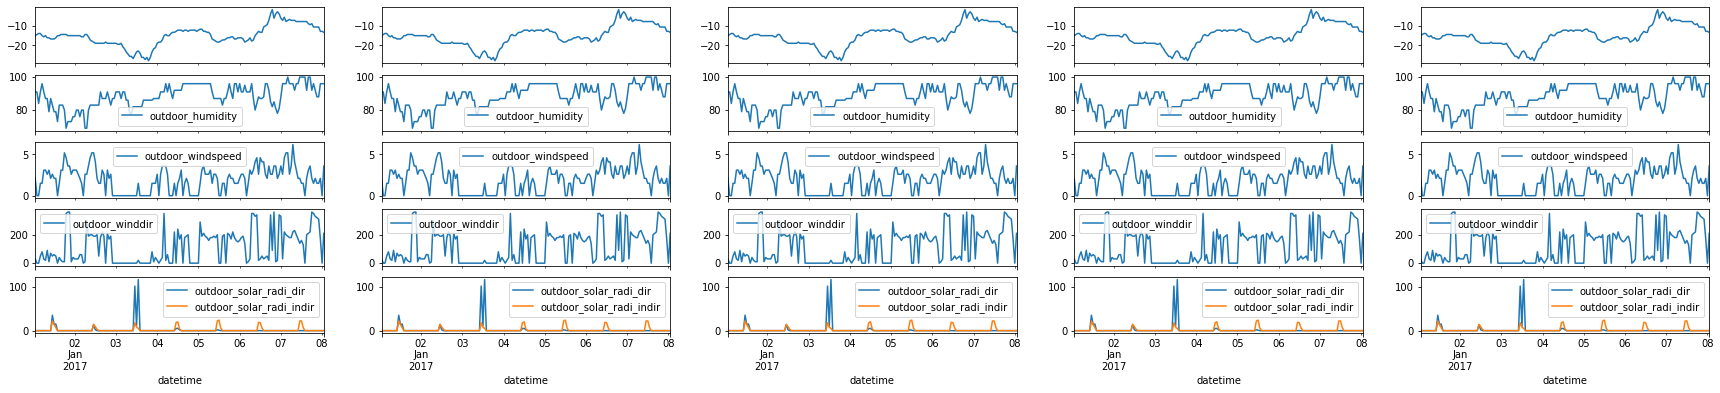

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

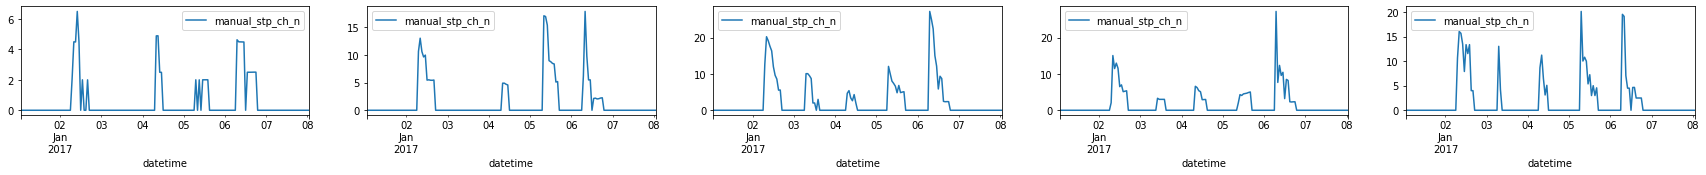

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

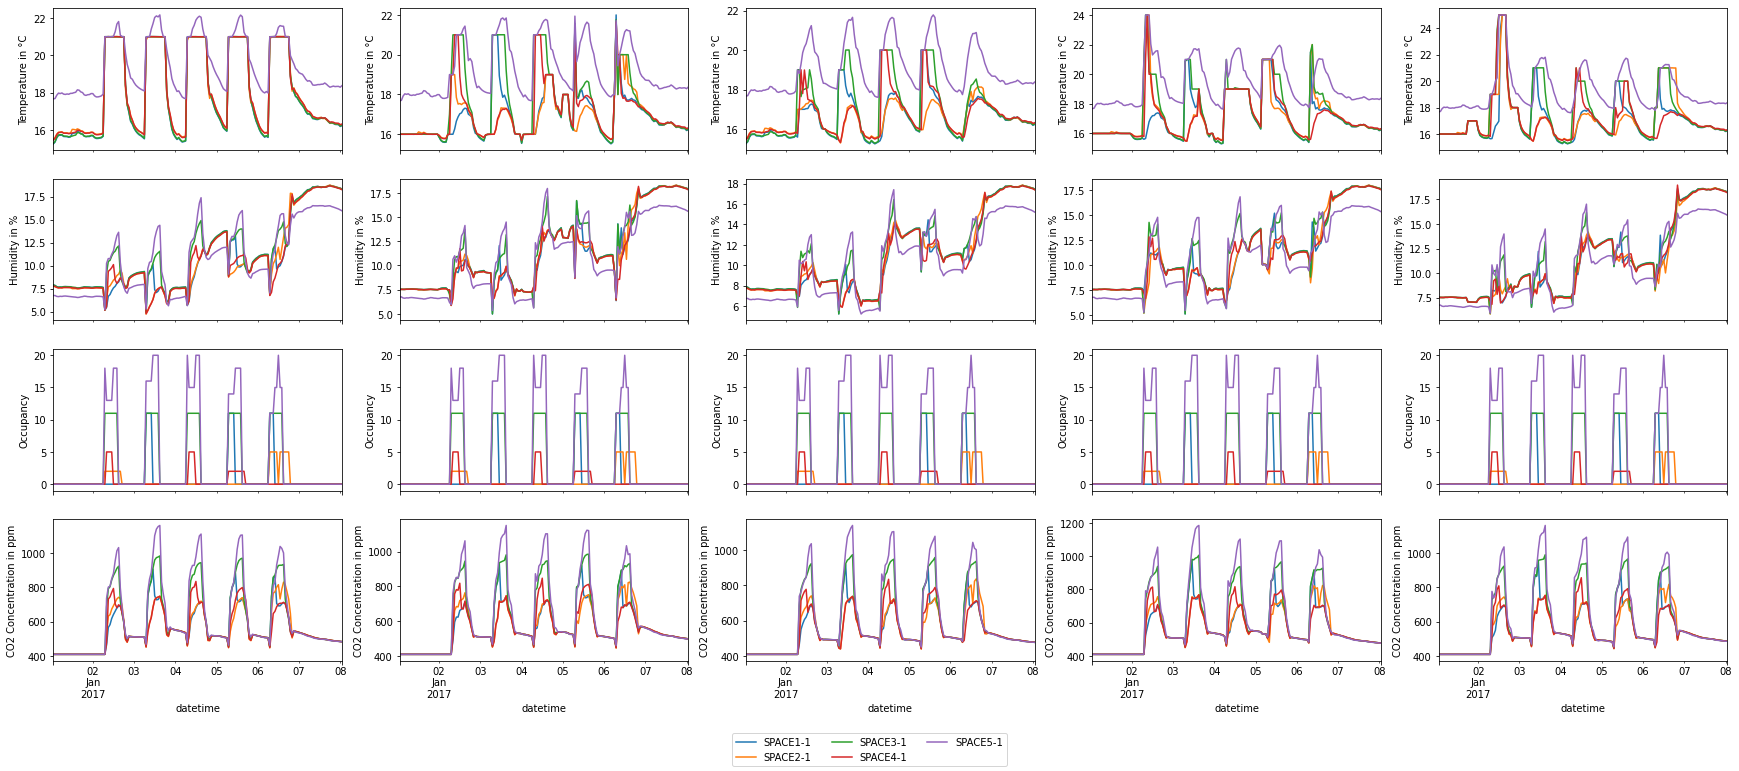

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

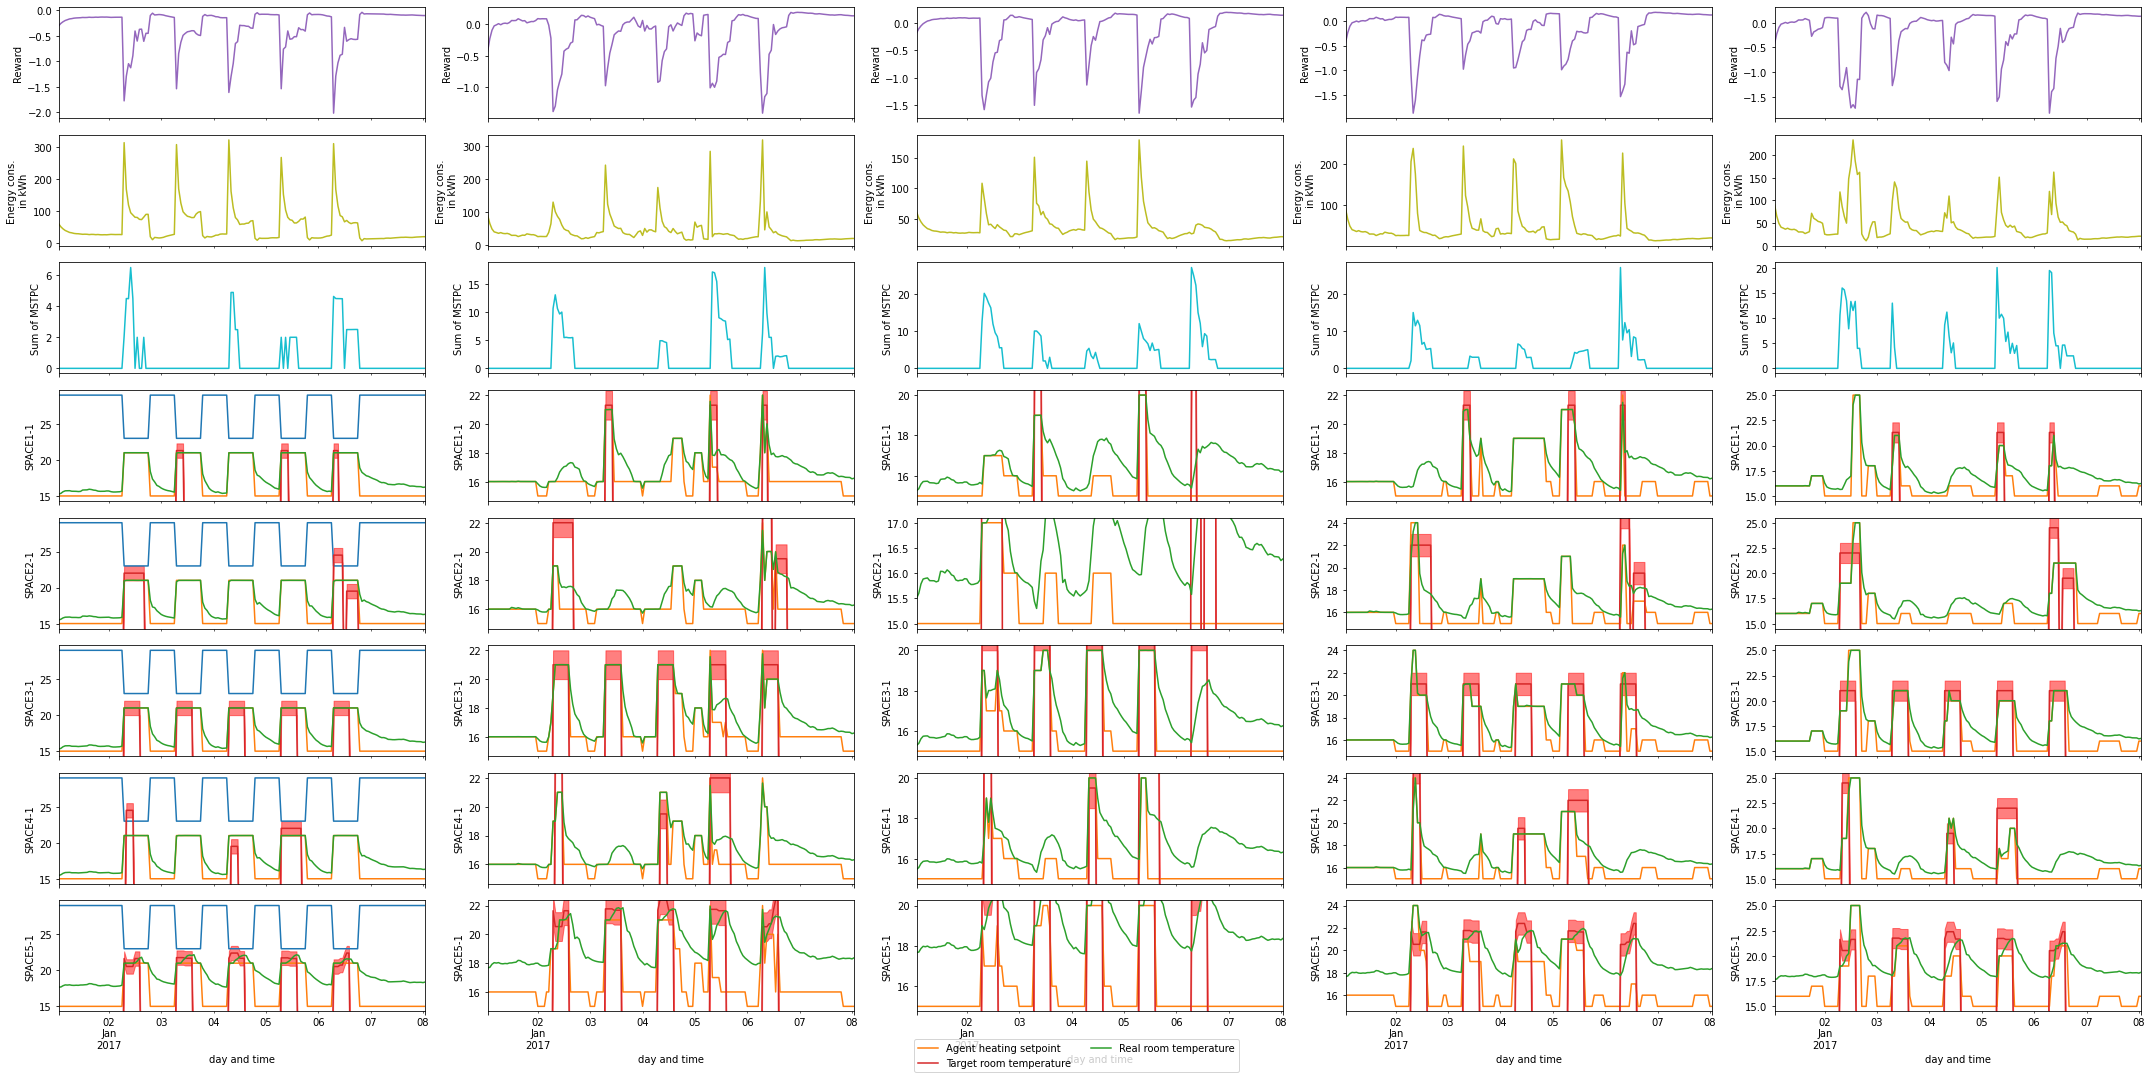

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

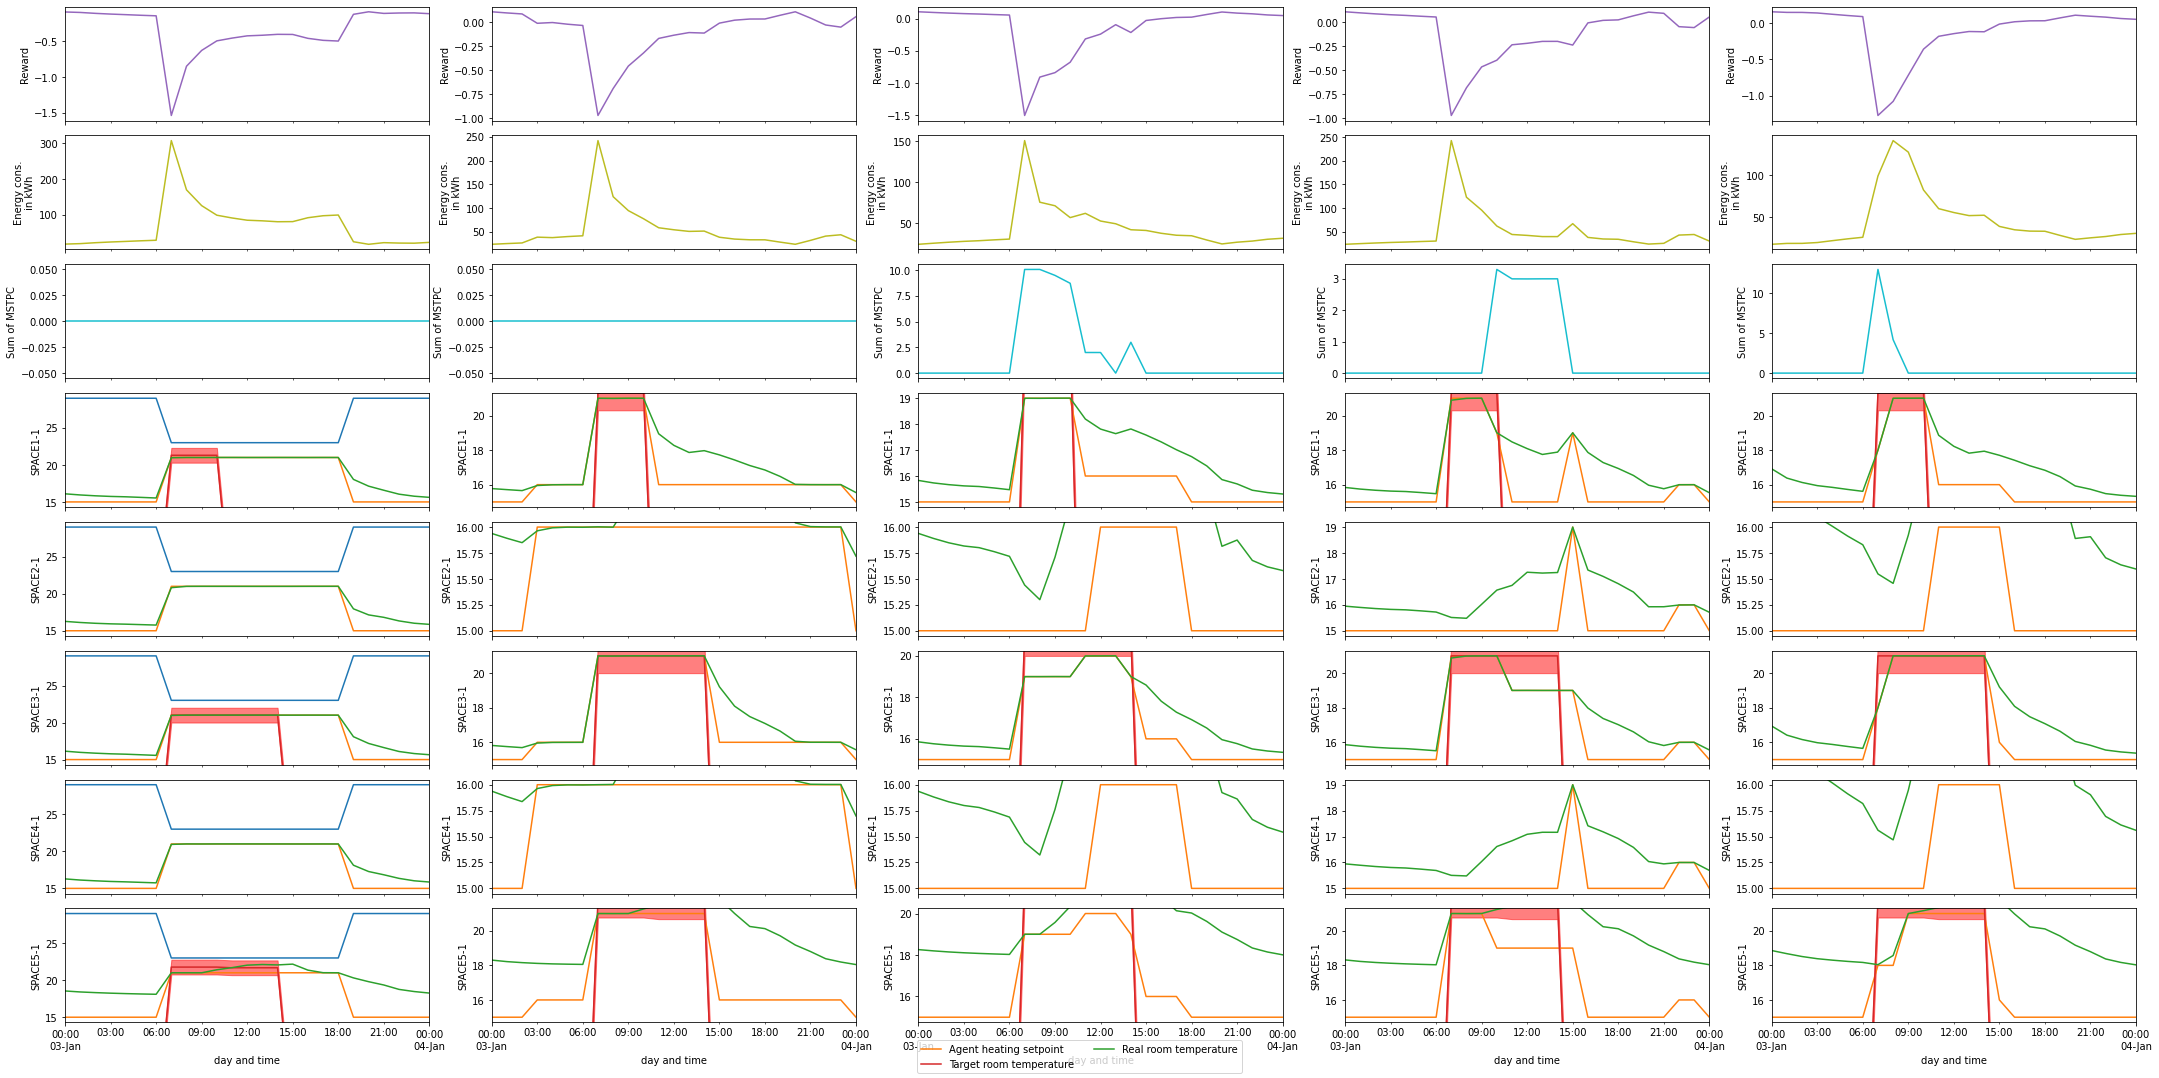

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  43891.3 Wh, mean reward = -0.1226
For plot number 3, mean energy consumption =  41474.0 Wh, mean reward = -0.0927
For plot number 4, mean energy consumption =  40806.2 Wh, mean reward = -0.1068
For plot number 5, mean energy consumption =  43448.6 Wh, mean reward = -0.1251


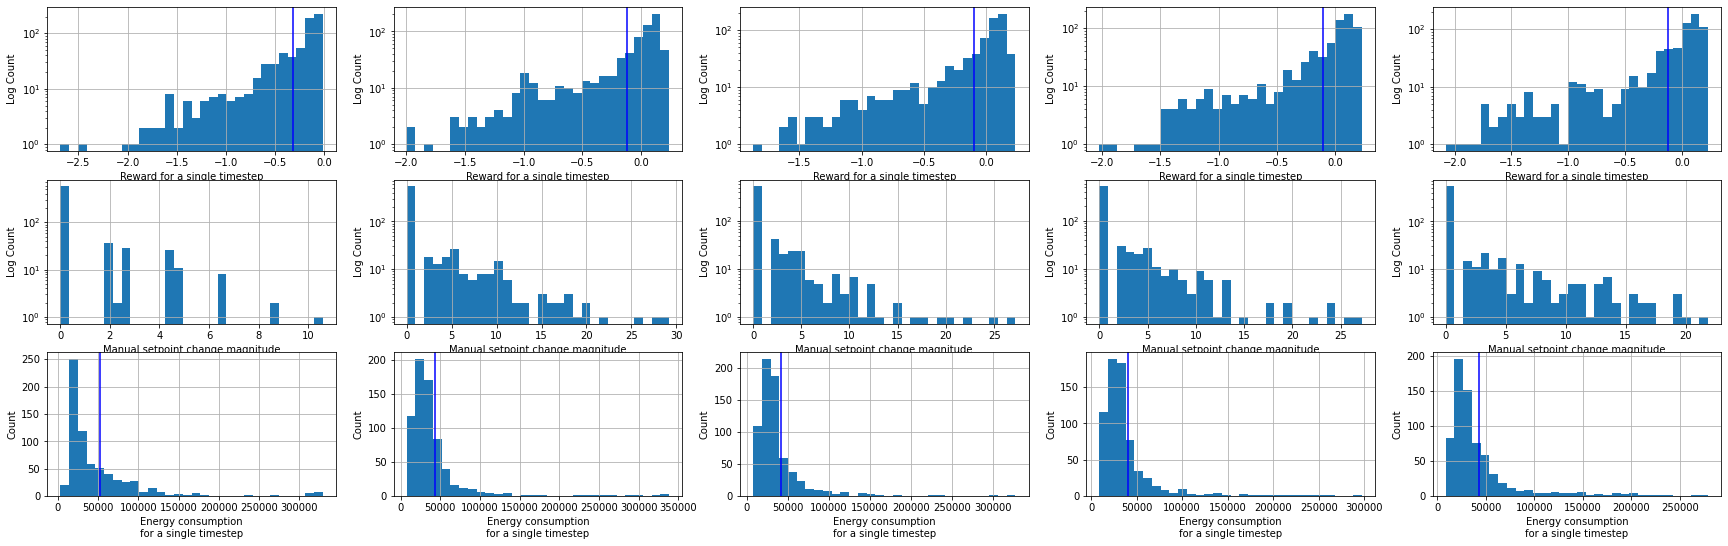

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

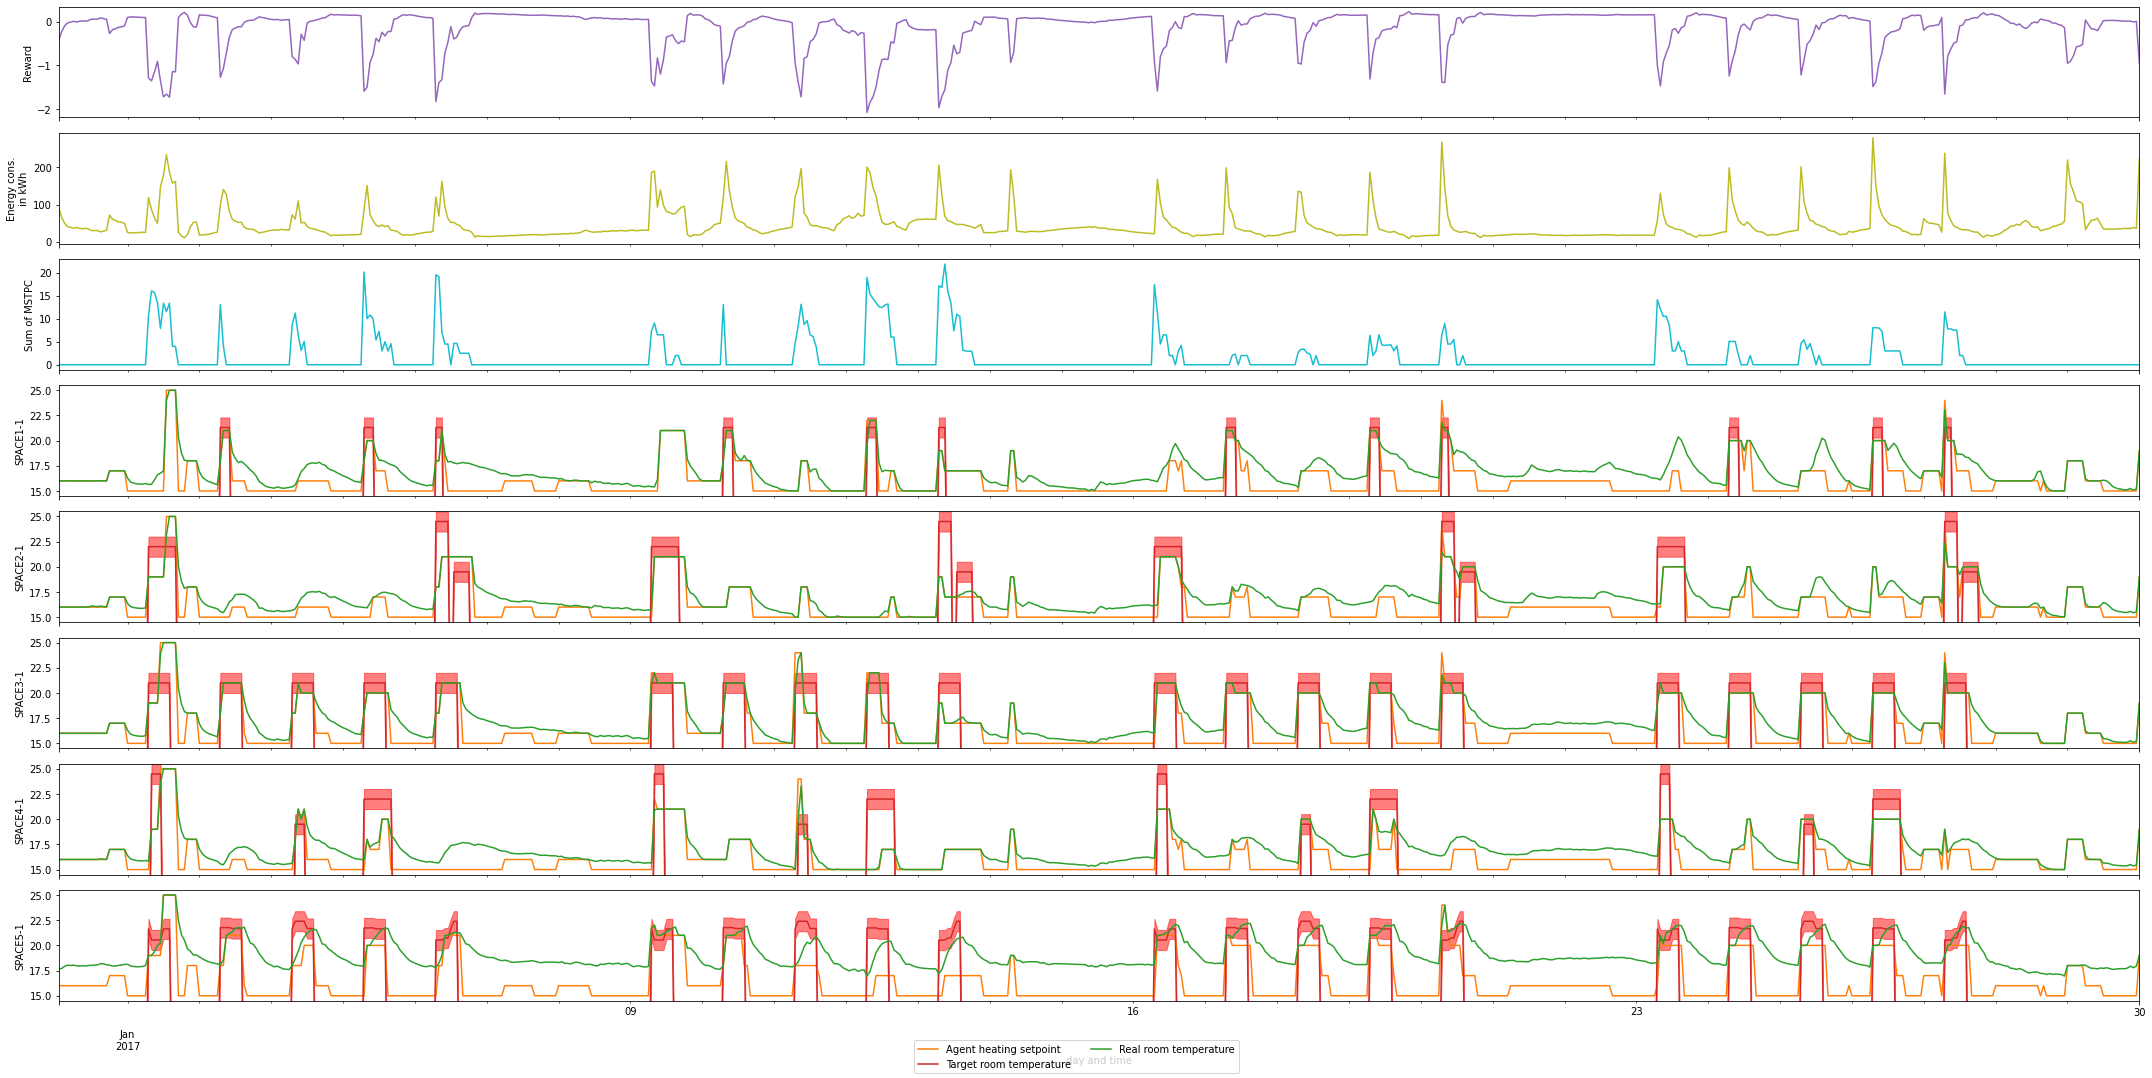

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

In [33]:
vh.plot_q_values(q_values, fig_width)

(<Figure size 2160x4320 with 40 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s310\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 1: s310\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 1: s310\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 1: s310\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 1: s310\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 2: s311\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s311\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 2: s311\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 2: s311\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 2: s311\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 3: s312\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s312\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 3: s312\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 3: s312\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 3: s312\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 4: s313\nAgent 0'>,
        <AxesSubplot:ylabel='Scen

outputs for thesis

In [59]:
fig, ax = plt.subplots(figsize=(6,3))
t1 = ax.twinx()
p1b= ax.plot(alldfs[3]['eels']["epsilon"], label="Epsilon (alternative)", color="tab:red")
p1 = ax.plot(alldfs[4]['eels']["epsilon"], label="Epsilon")
p2 = t1.plot(alldfs[4]['eels']["lr"], label="Learning rate", color="tab:orange")
ax.set_xlabel("Episodes")
t1.set_ylabel("Learning rate")
ax.set_ylabel("Epsilon")
ax.yaxis.label.set_color(p1[0].get_color())
t1.yaxis.label.set_color(p2[0].get_color())
ax.tick_params(axis='y', colors=p1[0].get_color())
t1.tick_params(axis='y', colors=p2[0].get_color())
ax.legend(handles=[p1[0],p1b[0],p2[0]])
fig.tight_layout()
#fig.savefig("saved_plots/Pretraining_SingleAndPartial_EpsilonDecay.png")
#fig.savefig("saved_plots/Pretraining_SingleAndPartial_EpsilonDecay.pdf")